# 1️⃣ DATASET DESCRIPTION
📌 Dataset Name
*   IMDb Dataset of 50K Movie Reviews

📌 Source
*   IMDb movie reviews
*   Available on Kaggle

📌 Size
*   50,000 reviews
*   25,000 training
*   25,000 testing

📌 Domain
*   Natural Language Processing (NLP)
*   Sentiment Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2️⃣ PROBLEM TYPE WE ARE SOLVING
❓ Question
*   Is a movie review positive or negative?

✅ Machine Learning Type
*   Supervised Learning

✅ Task Type
*   Binary Classification

✅ Algorithms Used
*   Logistic Regression
*   Naive Bayes

📌 Why NOT regression?
Output is categorical, not numeric

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Movie_Review_Assignment/IMDB Dataset.csv")

#EDA FOR TEXT

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()

,0
review,0
sentiment,0


In [8]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [9]:
df['review_length'] = df['review'].apply(len)
df['review_length'].describe()

,review_length
count,50000.000000
mean,1309.431020
std,989.728014
min,32.000000
25%,699.000000
50%,970.000000
75%,1590.250000
max,13704.000000


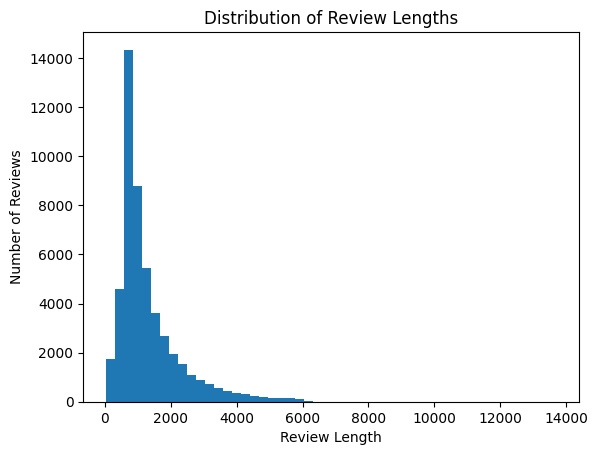

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['review_length'], bins=50)
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Lengths")
plt.show()

#Text Processing

In [11]:
df['sentiment'] = df['sentiment'].map({
    'positive':1,
    'negative':0
})

In [12]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [13]:
from sklearn.model_selection import train_test_split

x = df['review']
y = df['sentiment']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2, random_state=42
)

#text vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred_log = log_model.predict(x_test_tfidf)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

lr_accuracy = accuracy_score(y_test,y_pred_log)

print("Logistic Regression Accuracy: ", lr_accuracy)


Logistic Regression Accuracy:  0.8889


In [18]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



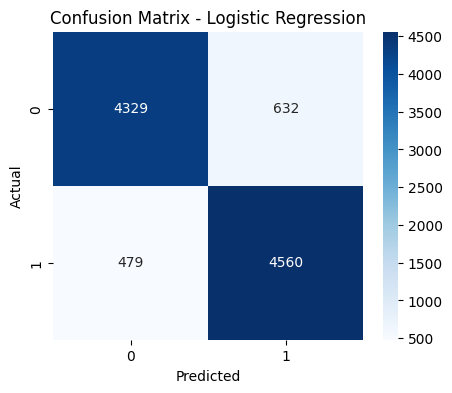

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_nb = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [20]:
import joblib

joblib.dump(log_model,"/content/drive/MyDrive/Movie_Review_Assignment/imdb_logistic_model.pkl")
joblib.dump(vectorizer, "/content/drive/MyDrive/Movie_Review_Assignment/tfidf_vectorizer.pkl")

['/content/drive/MyDrive/Movie_Review_Assignment/tfidf_vectorizer.pkl']

In [21]:
loaded_model = joblib.load("/content/drive/MyDrive/Movie_Review_Assignment/imdb_logistic_model.pkl")
loaded_vectorizer = joblib.load("/content/drive/MyDrive/Movie_Review_Assignment/tfidf_vectorizer.pkl")

review = ["this movie is good but i am not satisfied with this movie"]

review_vec = loaded_vectorizer.transform(review)
prediction = loaded_model.predict(review_vec)

print("Sentiment:",
      "Positive" if prediction[0] == 1 else "Negative")

Sentiment: Positive


#Apply Naive Bayes Model

In [22]:
from sklearn.naive_bayes import MultinomialNB


⚠ Important:
Multinomial Naive Bayes works best with TF-IDF or Count Vectorizer, which you are already using — good choice.

In [23]:
# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(x_train_tfidf, y_train)


MultinomialNB()

In [24]:
# Predict on test data
y_pred_nb = nb_model.predict(x_test_tfidf)


In [25]:
from sklearn.metrics import accuracy_score

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)


Naive Bayes Accuracy: 0.8508


In [26]:
from sklearn.metrics import classification_report

print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



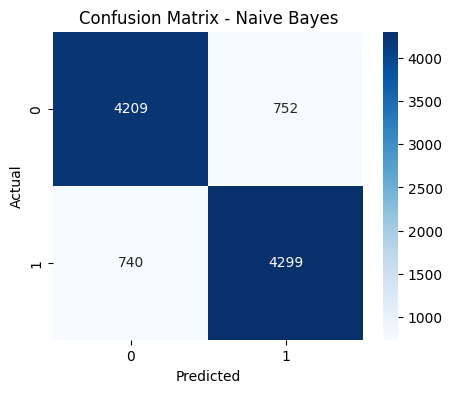

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [28]:
joblib.dump(nb_model, "/content/drive/MyDrive/Movie_Review_Assignment/naive_bayes_imdb.pkl")


['/content/drive/MyDrive/Movie_Review_Assignment/naive_bayes_imdb.pkl']

In [29]:
from sklearn.svm import LinearSVC

# Initialize model
svm_model = LinearSVC()

# Train model
svm_model.fit(x_train_tfidf, y_train)

LinearSVC()

In [30]:
# Predict
y_pred_svm = svm_model.predict(x_test_tfidf)

In [31]:
# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8772
SVM Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



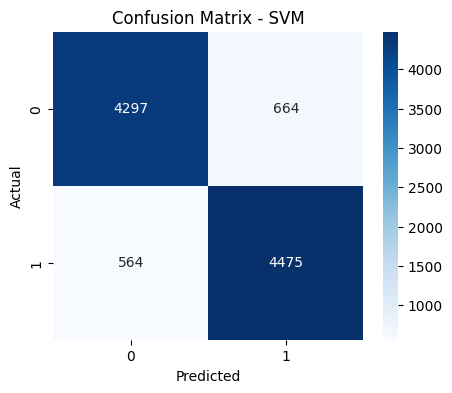

In [32]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

In [33]:
# Save model
joblib.dump(svm_model, "/content/drive/MyDrive/Movie_Review_Assignment/svm_imdb.pkl")

['/content/drive/MyDrive/Movie_Review_Assignment/svm_imdb.pkl']

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(x_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predict
y_pred_rf = rf_model.predict(x_test_tfidf)

In [36]:
# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8493
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



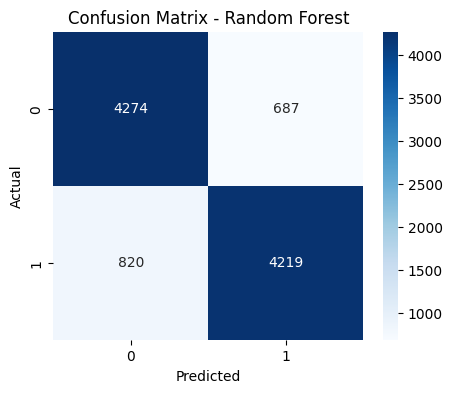

In [37]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [38]:
# Save model
joblib.dump(rf_model, "/content/drive/MyDrive/Movie_Review_Assignment/rf_imdb.pkl")

['/content/drive/MyDrive/Movie_Review_Assignment/rf_imdb.pkl']

#live test four models


In [39]:
# Load saved objects
loaded_tfidf = joblib.load("/content/drive/MyDrive/Movie_Review_Assignment/tfidf_vectorizer.pkl")
loaded_lr = joblib.load("/content/drive/MyDrive/Movie_Review_Assignment/imdb_logistic_model.pkl")
loaded_nb = joblib.load("/content/drive/MyDrive/Movie_Review_Assignment/naive_bayes_imdb.pkl")
loaded_svm = joblib.load("/content/drive/MyDrive/Movie_Review_Assignment/svm_imdb.pkl")
loaded_rf = joblib.load("/content/drive/MyDrive/Movie_Review_Assignment/rf_imdb.pkl")


# Test on sample review
sample_review = ["The movie was absolutely fantastic and inspiring"]

# Vectorize the review
sample_vector = loaded_tfidf.transform(sample_review)

# Get predictions
lr_pred = loaded_lr.predict(sample_vector)[0]
nb_pred = loaded_nb.predict(sample_vector)[0]
svm_pred = loaded_svm.predict(sample_vector)[0]
rf_pred = loaded_rf.predict(sample_vector)[0]

# Label mapping (adjust if your encoding is reversed)
label_map = {
    1: "Positive",
    0: "Negative"
}

print("Logistic Regression Prediction:", label_map[lr_pred])
print("Naive Bayes Prediction:", label_map[nb_pred])
print("Support Vector Machine:", label_map[svm_pred])
print("Random Forest Classifier:", label_map[rf_pred])


Logistic Regression Prediction: Positive
Naive Bayes Prediction: Positive
Support Vector Machine: Positive
Random Forest Classifier: Positive


#Comparison

In [40]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "Random Forest Classifier"],
    "Accuracy": [lr_accuracy, nb_accuracy, svm_accuracy, rf_accuracy]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.8889
1,Naive Bayes,0.8508
2,Support Vector Machine,0.8772
3,Random Forest Classifier,0.8493
